# Making vowel plots with matplotlib and pandas in Python

This notebook explains several methods for plotting a phonetic vowel space from F1 and F2 values. The data here is generated randomly, but any Excel or CSV file of your own can be imported in its place. 

See also [the related post](https://www.nickdanis.com/2021/06/03/how-to-make-a-vowel-chart-using-matplotlib.html).

## Getting some data

For our vowel plot, we'll start with some example formant values from the *Language Files* textbook. If you already have data ready to work with, skip to the **Making the plot** section below. They give the following F1 and F2 values for a typical American English speaker. These are defined in a dictionary, which is used to create the initial pandas dataframe `lf_df`. Import the necessary packages, and define the initial dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
# "Typical" formant values for AmE, from Language Files 12 p. 79
lf_vowels = {'vowel' : ['i','ɪ','ɛ','æ','u','ʊ','ɔ','ɑ'],
            'F1' : [280, 400, 550, 690, 310, 450, 590, 710],
            'F2' : [2250, 1920, 1770, 1660, 870, 1030, 880, 1100]}

df = pd.DataFrame(lf_vowels)

To get the full effect of our plot, the following cell generates dummy values for 20 additional tokens for each type of vowel. `F1` and `F2` are defined as the values straight from *Language Files*. Random values are generated with the following two lines:

```python
rand_F1s = np.random.randint(.8*F1, 1.2*F1, 20)
rand_F2s = np.random.randint(.8*F2, 1.2*F2, 20)
```

The first argument, `.8*F1`, sets a lower bound of 80% of the given formant value, and the second arguments sets an upper bound of 120% of the given formant value. 20 integers between these bounds are randomly generated, and added to the initial dataframe.

In [3]:
# Generate dummy formant values based on LF values:
for v in df.vowel.unique():
    F1 = df.F1.loc[df.vowel == v].values[0]
    F2 = df.F2.loc[df.vowel == v].values[0]
    rand_F1s = np.random.randint(.8*F1, 1.2*F1, 20)
    rand_F2s = np.random.randint(.8*F2, 1.2*F2, 20)
    new_vs = pd.DataFrame({'vowel' : list(v*20), 'F1' : list(rand_F1s), 'F2' : list(rand_F2s)})
    df = pd.concat([df,new_vs], ignore_index=True)
    
#print(lf_df.sample(10).to_markdown())

The resulting dataframe now has additional values for each vowel, like the sample below shows.

|     | vowel   |   F1 |   F2 |
|----:|:--------|-----:|-----:|
| 462 | ɔ       |  652 |  783 |
| 503 | i       |  302 | 1895 |
|   2 | ɛ       |  550 | 1770 |
| 414 | u       |  312 |  707 |
| 584 | u       |  329 |  704 |
| 319 | ɑ       |  600 | 1099 |
| 449 | ɔ       |  533 |  831 |
| 418 | u       |  369 |  816 |
| 629 | ɑ       |  568 | 1000 |
| 535 | ɛ       |  620 | 1530 |

If you are importing your own data, make sure you adjust for the column headings as defined here. (The leftmost column is the index and can be ignored.)

In [4]:
df

,vowel,F1,F2
0,i,280,2250
1,ɪ,400,1920
2,ɛ,550,1770
3,æ,690,1660
4,u,310,870
...,...,...,...
163,ɑ,615,917
164,ɑ,758,1114
165,ɑ,825,1271
166,ɑ,709,954


## Making the plot

There are multiple ways to plot vowels. The strategy in the code below is to plot every formant value with a *blank* marker (or symbol), and then to loop through the vowels themselves and *annotating* the points with the vowel symbols themselves. 

Plotting the values is done below:

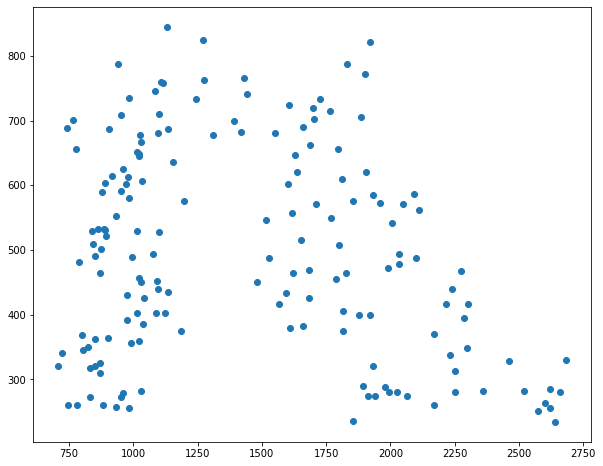

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

x_name = 'F2'
y_name = 'F1'

x = df[x_name]
y = df[y_name]

ax.scatter(x, y)
plt.show()

The variables `x_name` and `y_name` simply store a string that will be used both to get columns in the dataframe and to use as eventual axis labels. The `x` and `y` variables are the numerical data themselves, defined as Series objects from our dataframe using the `x_name` and `y_name` variables. The plot is pretty terrible so far, because there's nothing to tell the vowels apart. This will be done with annotations. To see how it can be done by plotting each vowel separately, see the alternate strategy at the end.

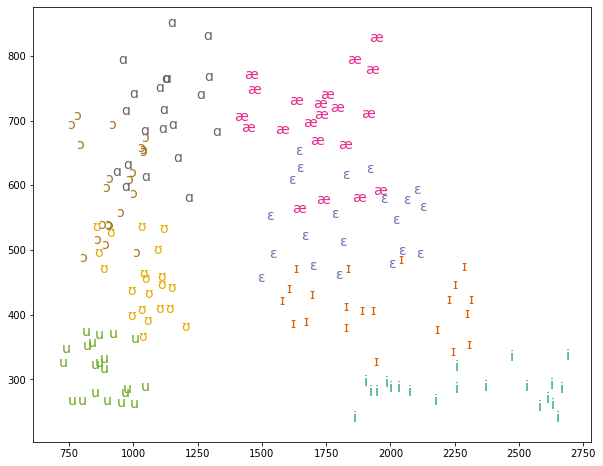

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

x_name = 'F2'
y_name = 'F1'

x = df[x_name]
y = df[y_name]

ax.scatter(x, y,marker="")

cmap = cm.get_cmap('Dark2')
for v, color in zip(df.vowel.unique(),cmap.colors):
    X = df[x_name].loc[df.vowel == v]
    Y = df[y_name].loc[df.vowel == v]
    for x, y in zip(X,Y):
        ax.annotate(v,(x,y), xytext = (0,0), textcoords='offset points',fontsize=14,color=color)

plt.show()

The code above sets the marker to nothing `""`, and adds the following `for` loop:

```python
cmap = cm.get_cmap('Dark2')
for v, color in zip(df.vowel.unique(),cmap.colors):
    X = df[x_name].loc[df.vowel == v]
    Y = df[y_name].loc[df.vowel == v]
    for x, y in zip(X,Y):
        ax.annotate(v,(x,y), xytext = (0,0), textcoords='offset points',fontsize=14,color=color)
```

`df.vowel.unique()` isolates all unique entries in the `'vowels'` column of the dataframe, and the `cmap.colors` object contains a list of colors as defined by `cmap = cm.get_cmap('Dark2')`. (Note that you should also have `from matplotlib import cm` in your code.) [Colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) are predefined gradients and lists of colors that are built in to matplotlib. If you print `cmap.colors` you should see simply a list of color values. The `zip()` function in the `for` loop pairs each vowel type with a specific color. 

The capital `X` and `Y` variables are defined as all format values (F2 and F1, respectively) for those individual vowels. Because each vowel has multiple vowels, there is another nested `for` loop that `zip`s `X` and `Y` once again. Each `(x, y)` pair here are the values for that particular vowel. 

The `ax.annotate(v,(x,y),fontsize=14,color=color)` command says:
- put the text label `v`, which here is the vowel symbol, as defined by the outer `for` loop
- at coordinates `(x,y)`, defined by the *inner* for loop
- at size 14
- as color `color`, where `color` is the current color in the `cmap` list defined.

As the outer `for` loop iterates to the next unique vowel symbol, the color will change as well. When we see this on the plot, each grouping of the same vowel is colored distinctly from the others.

Our plot is pretty good so far, except...it's upside down! And flipped! High, front vowels are in the low, back section. We need to invert each axis, and add some labels and a title for posterity. The following code accomplishes this. It also moves the tick locations to the top and the right, which is optional but not uncommon with vowel plots. Note that the axis labels are defined with the `x_name` and `y_name` variables as defined previously. This is optional, but I find it convenient. 

```python
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel(x_name,fontsize=16)
ax.set_ylabel(y_name,fontsize=16)
ax.yaxis.tick_right()
ax.xaxis.tick_top()
ax.yaxis.set_label_position("right")
ax.xaxis.set_label_position("top")
```



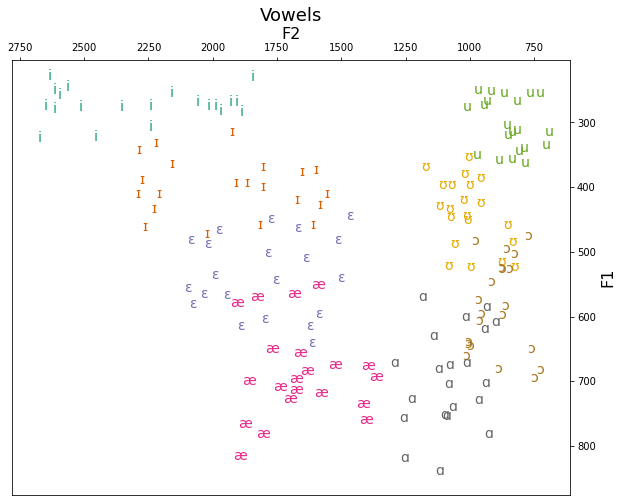

In [7]:
cmap = cm.get_cmap('Dark2')

fig, ax = plt.subplots(figsize=(10,8))

x_name = 'F2'
y_name = 'F1'

x = df[x_name]
y = df[y_name]

ax.scatter(x, y,marker="")

for v, color in zip(df.vowel.unique(),cmap.colors):
    X = df[x_name].loc[df.vowel == v]
    Y = df[y_name].loc[df.vowel == v]
    for x, y in zip(X,Y):
        ax.annotate(v,(x,y),fontsize=14,color=color)

ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel(x_name,fontsize=16)
ax.set_ylabel(y_name,fontsize=16)
ax.yaxis.tick_right()
ax.xaxis.tick_top()
ax.yaxis.set_label_position("right")
ax.xaxis.set_label_position("top")
ax.set_title('Vowels',fontsize=18)
#ax.grid()
#plt.savefig('my_vowel_plot.png')
plt.show()

And that's it! It can be customized further, or exported as-is. Uncommenting the `plt.savefig()` command will save the plot to a file with the given name, for use in papers and presentations. 

## Alternate plotting method: I am Legend

The method below includes only a single `for` loop, and calls the `ax.scatter()` command for every unique vowel, adding a label each time. The label is used when printing the legend with the `plt.legend()` command. This method has the advantage that matplotlib will choose a new color for you for each vowel (which you can always of course customize), but depending on the colors, the vowel quality of certain points might not be obvious to identify.

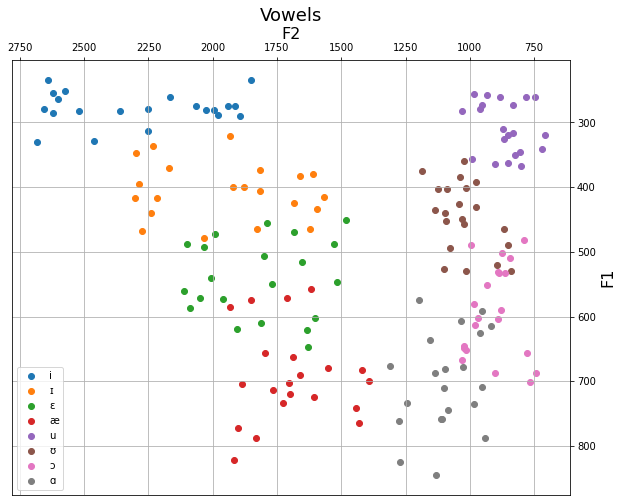

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

for v in df.vowel.unique():
    x = df.F2.loc[df.vowel == v]
    y = df.F1.loc[df.vowel == v]
    ax.scatter(x, y, label=v)

ax.set_xlabel('F2',fontsize=16)
ax.set_ylabel('F1',fontsize=16)
ax.set_title('Vowels',fontsize=18)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.invert_xaxis()
ax.invert_yaxis()
ax.grid()
plt.legend()
plt.show()